In [1]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns

In [2]:
#importent library's 
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# Split the column name to get the model of the car
df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [7]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [11]:
car = df.copy()

In [10]:
df.describe() 

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
car["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Audi', 'BMW',
       'Fiat', 'Datsun', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Ambassador', 'Jeep', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object')

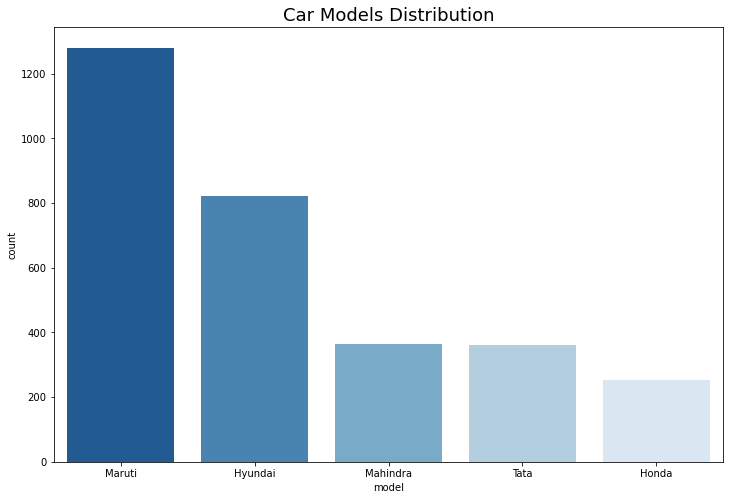

In [15]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="model", data=car, order = car['model'].value_counts().index[:5], palette='Blues_r')
plt.show()

In [18]:

sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
plt.show()
categorical_summarized(car, x='fuel')

NameError: name 'x' is not defined

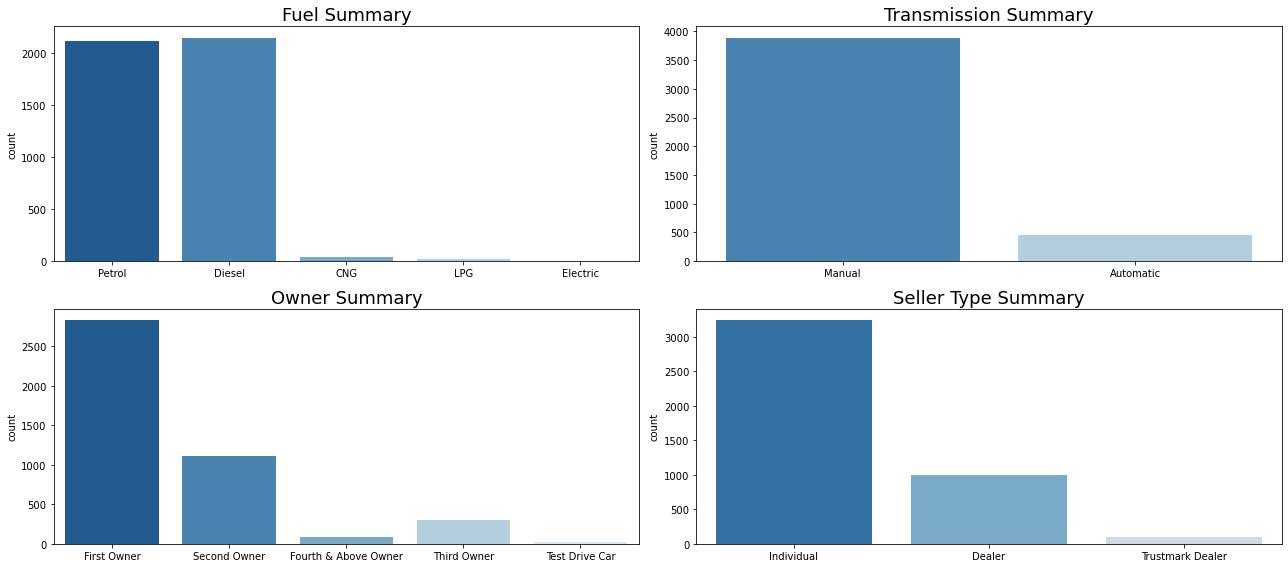

In [22]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

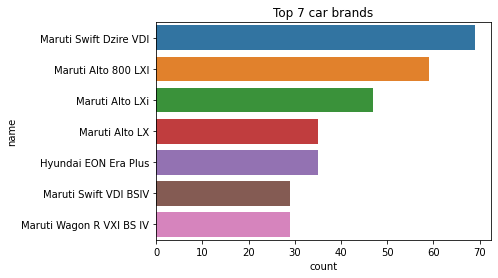

In [23]:
sns.countplot(y=df['name'],
              order=df['name'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 car brands')
plt.show()

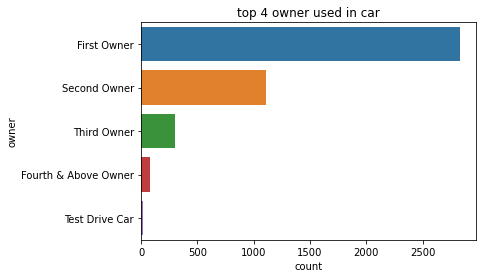

In [24]:
sns.countplot(y=df['owner'],
              order=df['owner'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 owner used in car')
plt.show()

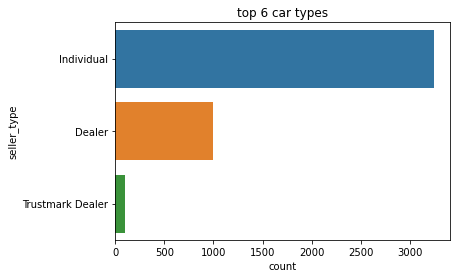

In [25]:
sns.countplot(y=df['seller_type'],
             order=df['seller_type'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('top 6 car types')
plt.show()

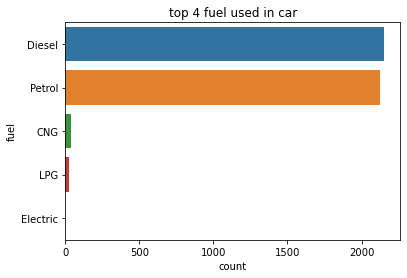

In [26]:
sns.countplot(y=df['fuel' ],
              order=df['fuel' ].value_counts().sort_values(ascending=False).index)
plt.title('top 4 fuel used in car')
plt.show()

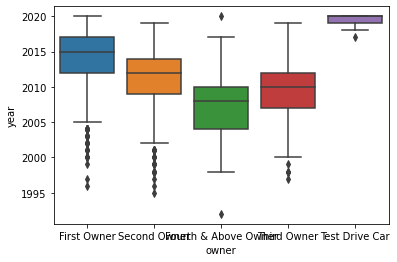

In [27]:
sns.boxplot(y=df['year'],x=df['owner'])
plt.show()

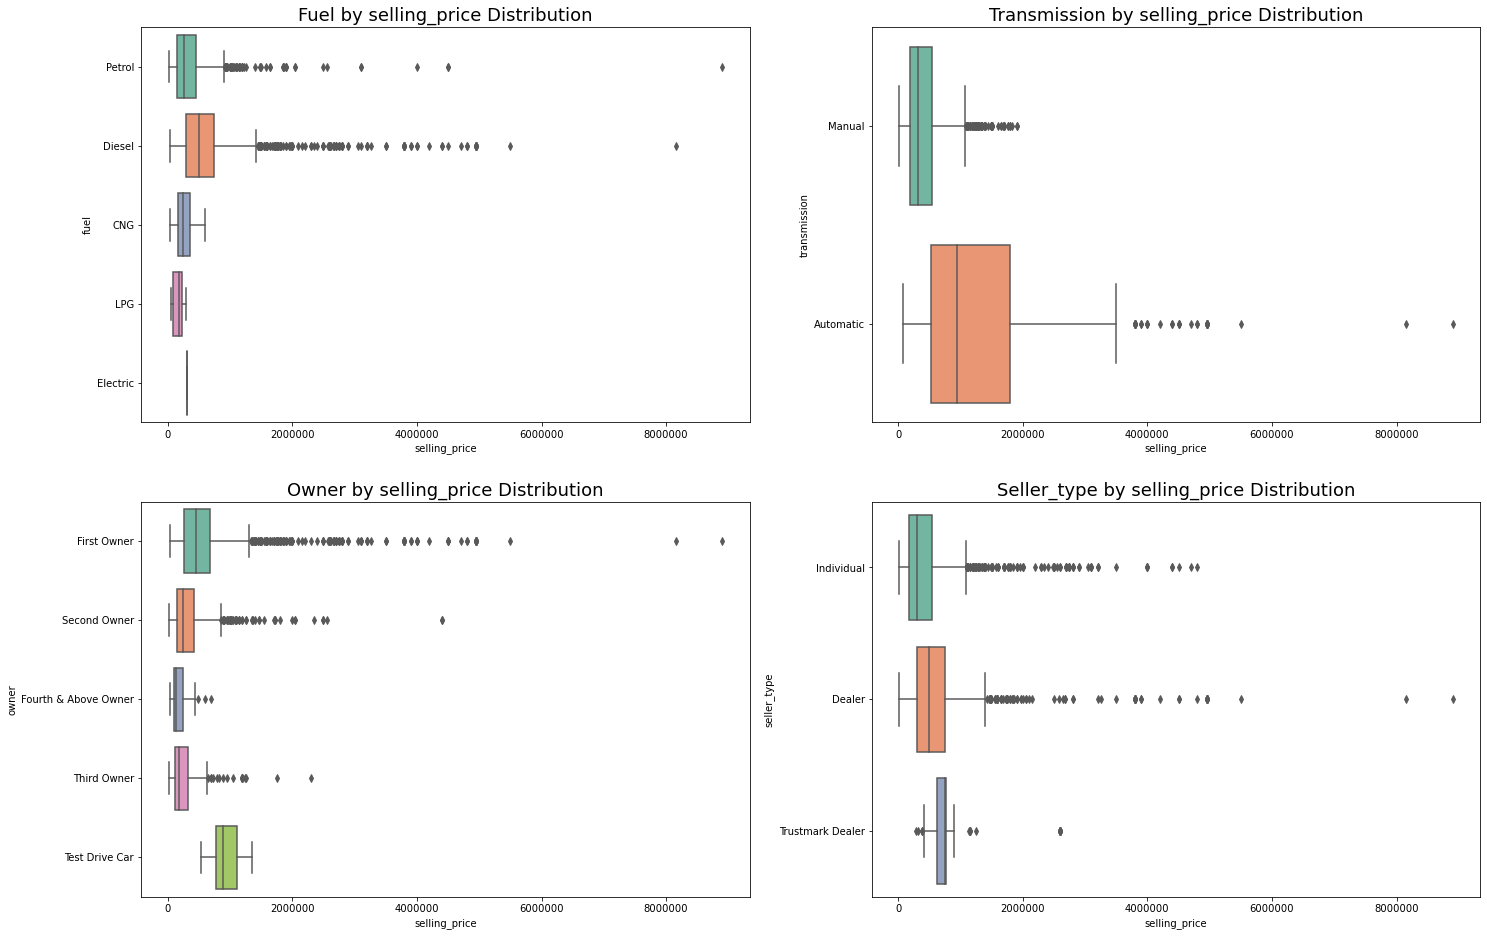

In [29]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

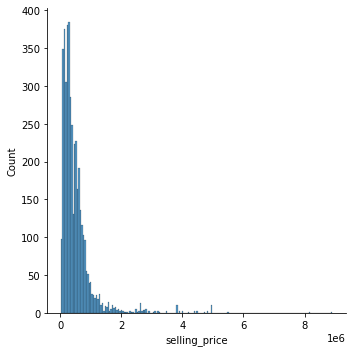

In [30]:
sns.displot(df['selling_price'])
plt.show()

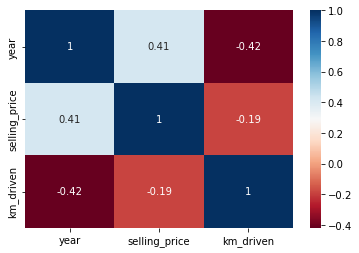

In [31]:
corr =  df.corr()


sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [32]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2001.00,2003.0,2004.0,2005.0,2014.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,55000.00,65000.0,70000.0,80000.0,350000.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,1444.68,5000.0,6483.4,10000.0,60000.0,163830.0,186000.0,220000.0,806599.0


In [ ]:
#### Outlier handling

In [37]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

In [38]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4340, 8)
(4340,)


In [44]:
print(4340*0.25)#old 3577

1085.0


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3255, 8)
(1085, 8)
(3255,)
(1085,)


In [46]:
#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score